In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


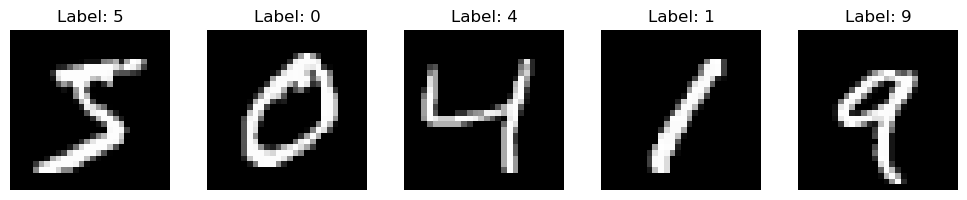

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training Images Shape:", x_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Images Shape:", x_test.shape)
print("Testing Labels Shape:", y_test.shape)

# Display first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# Normalize images from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Converts 2D image to 1D array
    Dense(128, activation='relu'),       # First hidden layer
    Dropout(0.2),                         # Dropout for regularization
    Dense(64, activation='relu'),        # Second hidden layer
    Dense(10, activation='softmax')      # Output layer (10 classes)
])


C:\Users\sdshe\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8438 - loss: 0.5120 - val_accuracy: 0.9692 - val_loss: 0.1062
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1460 - val_accuracy: 0.9725 - val_loss: 0.0899
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1061 - val_accuracy: 0.9758 - val_loss: 0.0816
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9738 - loss: 0.0845 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9764 - loss: 0.0752 - val_accuracy: 0.9738 - val_loss: 0.0852
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9801 - loss: 0.0607 - val_accuracy: 0.9777 - val_loss: 0.0787
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0594 - val_accuracy: 0.9808 - val_loss: 0.0707
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0536 - 

In [15]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0967
Test Accuracy: 97.70%


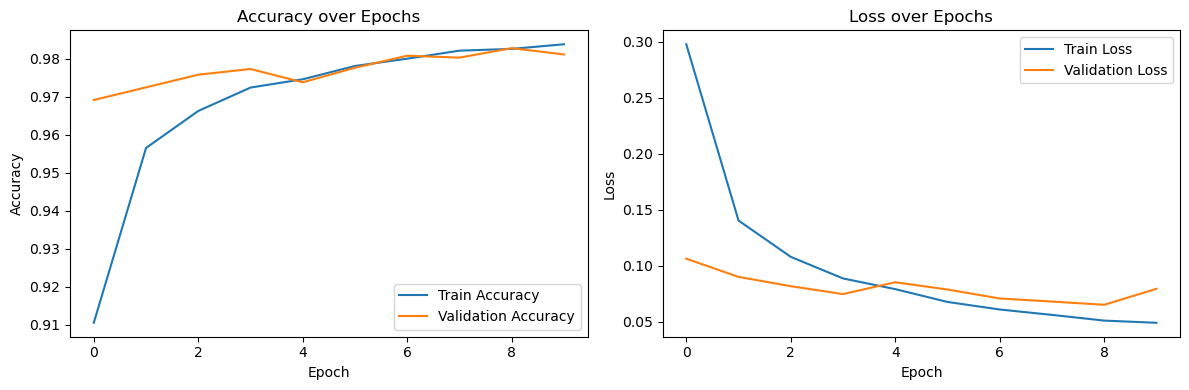

In [19]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step


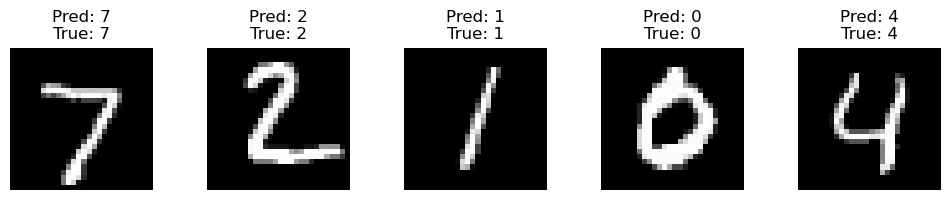

In [21]:
# Predict
predictions = model.predict(x_test)

# Show predictions on first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test_cat[i])
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
